In [6]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [7]:
def the_oracle(my_input):
    winner=7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [8]:
for index, trail_number in enumerate(my_list):
    if the_oracle(trail_number) is True:
        print("index :",index," ,Oracle used : ",index+1) 

index : 9  ,Oracle used :  10


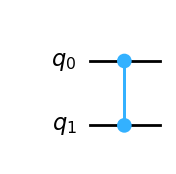

In [9]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import Aer

#define the oracle circuit
oracle = QuantumCircuit(2, name="oracle")
oracle.cz(0,1)
oracle.to_gate()

oracle.draw("mpl")

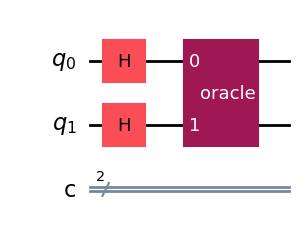

In [10]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw('mpl')

In [11]:
backend = Aer.get_backend("statevector_simulator")
# Simulate the circuit
t_qc = transpile(grover_circ, backend)
print(t_qc)
result = backend.run(t_qc).result()
sv = result.get_statevector()
np.around(sv,2)


# counts = result.get_counts()

# print(counts)

# # plot the results
# from qiskit.visualization import plot_histogram
# plot_histogram(counts)

/Users/murshed/Documents/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


     ┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘   
c: 2/════════
             


array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

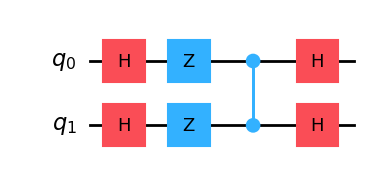

In [12]:
reflection = QuantumCircuit(2, name="reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw("mpl")

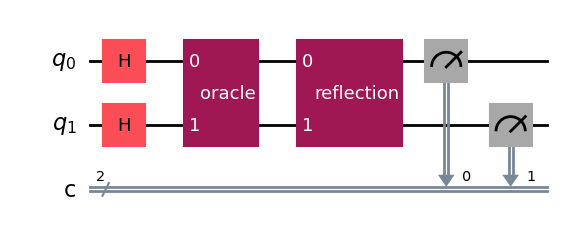

In [13]:

grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw('mpl')

     ┌───┐   ┌───────────┐   ┌───┐┌─┐   
q_0: ┤ H ├─■─┤ U2(-π,-π) ├─■─┤ H ├┤M├───
     ├───┤ │ ├───────────┤ │ ├───┤└╥┘┌─┐
q_1: ┤ H ├─■─┤ U2(-π,-π) ├─■─┤ H ├─╫─┤M├
     └───┘   └───────────┘   └───┘ ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1 
Result(backend_name='qasm_simulator', backend_version='0.17.0', qobj_id='', job_id='e2badf68-fefa-44a1-a10a-b76503ce62a3', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-178', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1444993408, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 11, 'parallel_shots': 1, 'sample_measure_time': 0.000932042, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'dev

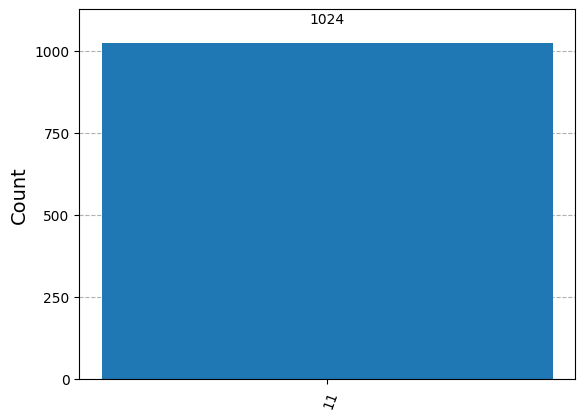

In [14]:
backend = Aer.get_backend("qasm_simulator")
# Simulate the circuit
t_qc = transpile(grover_circ, backend)
print(t_qc)
result = backend.run(t_qc).result()
print(result)

counts = result.get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

NameError: name 'qc' is not defined

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw('mpl')

backend = Aer.get_backend("statevector_simulator")
# Simulate the circuit
t_qc = transpile(grover_circ, backend)

result = backend.run(t_qc).result()
sv = result.get_statevector()
np.around(sv,2)

     ┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1 


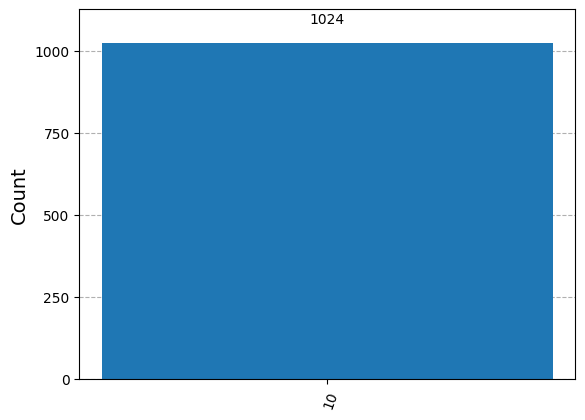

In [24]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(1)
test_qc.x(0)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()
print(test_qc)

backend = Aer.get_backend("qasm_simulator")
# Simulate the circuit
t_qc = transpile(test_qc, backend)
result = backend.run(t_qc).result()

counts = result.get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)